<a href="https://colab.research.google.com/github/lorenafc/MGI/blob/main/Maplapse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import geopandas as gpd
import folium
from folium import Marker
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving merged_additional_authors_encoded.xlsx to merged_additional_authors_encoded.xlsx


In [ ]:
file_name = 'merged_additional_authors_encoded.xlsx'
authors_small_cities = pd.read_excel(file_name, engine='openpyxl')
authors_small_cities_copy=authors_small_cities.copy()
authors_small_cities_copy.rename(columns={'Unnamed: 0': 'indexauthor'}, inplace=True)
authors_small_cities_copy.head()

,indexauthor,starturl,bitrhyear,deathyear,nameandbirthdeathyear,georeferenceurl,borncity,deathcity,activecity,latitude_born,longitude_born,latitude_death,longitude_death,latitude_active,longitude_active
0,0,http://viaf.org/viaf/81048146,1570,1634.0,"Carneiro, Tomé Tavares 1570-1634",viafprocessedfile,,NaN,Rio Tinto,NaN,NaN,NaN,NaN,-6.803828,-35.077569
1,1,http://viaf.org/viaf/180581759,NaN,1775.0,"Kolíček, Caesarij, -1775",viafprocessedfile,,Cieszin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,http://viaf.org/viaf/100161519,NaN,1570.0,"Hertel, Jakob 15..?-1570",http://catalogue.bnf.fr/ark:/12148/cb15011774s,(Chur,NaN,NaN,46.854747,9.526490,NaN,NaN,NaN,NaN
3,3,http://viaf.org/viaf/169350346,1699,1770.0,"Ferro Caaveyro, Lucas Antonio ca. 1699-1770",www.wikidata.org/wiki/Q3393623#sitelinks-wikip...,A Capela,NaN,NaN,43.442068,-8.043400,NaN,NaN,NaN,NaN
4,4,http://viaf.org/viaf/67541728,1502,1600.0,"Aparicio, Sebastián de 1502-1600 Santo",www.wikidata.org/wiki/Q2486114#sitelinks-wikip...,A Gudiña,Puebla City,NaN,42.060548,-7.140352,19.04372,-98.198149,NaN,NaN


In [ ]:
# # Count the occurrences of each city in the 'activecity' column
# city_counts = authors_small_cities_copy['activecity'].value_counts()

# # Map the counts to the 'activecity' column
# authors_small_cities_copy['activecitycount'] = authors_small_cities_copy['activecity'].map(city_counts)

# print(authors_small_cities_copy.head(10))

   indexauthor                        starturl bitrhyear  deathyear  \
0            0   http://viaf.org/viaf/81048146      1570     1634.0   
1            1  http://viaf.org/viaf/180581759       NaN     1775.0   
2            2  http://viaf.org/viaf/100161519       NaN     1570.0   
3            3  http://viaf.org/viaf/169350346      1699     1770.0   
4            4   http://viaf.org/viaf/67541728      1502     1600.0   
5            5  http://viaf.org/viaf/121452165      1320     1394.0   
6            6   http://viaf.org/viaf/62383957      1538     1592.0   
7            7   http://viaf.org/viaf/67541507      1530     1596.0   
8            8   http://viaf.org/viaf/78669554      1640     1705.0   
9            9   http://viaf.org/viaf/79445202      1731     1797.0   

                         nameandbirthdeathyear  \
0             Carneiro, Tomé Tavares 1570-1634   
1                     Kolíček, Caesarij, -1775   
2                     Hertel, Jakob 15..?-1570   
3  Ferro Caaveyro,

In [ ]:

# Create the 'countcitygroupby' column that will count how many times each location repeats
authors_small_cities_copy['countcityactivegroupby'] = authors_small_cities_copy.groupby('activecity')['activecity'].transform('count') # Remove the immediate type casting


required_columns = ["indexauthor","bitrhyear", 'deathyear', 'activecity', 'latitude_active', 'longitude_active', 'countcityactivegroupby']
authors_maplapse_active = authors_small_cities_copy[required_columns].copy()


authors_maplapse_active['countcityactivegroupby'] = authors_maplapse_active['countcityactivegroupby'].fillna(0).astype(int) # Fill NaN values and then convert to int

# Drop rows where 'latitude_active' column has NaN values
authors_maplapse_active.dropna(subset=['latitude_active'], inplace=True)

# New df with fewer columns and no NAN values
print(authors_maplapse_active.head())

    indexauthor bitrhyear  deathyear  activecity  latitude_active  \
0             0      1570     1634.0   Rio Tinto        -6.803828   
10           10      1706     1761.0      Prešov        49.000007   
17           17      1716     1776.0  Königgrätz        50.209211   
19           19      1618     1678.0     Kolberg        54.176068   
30           30       NaN     1743.0        Żary        51.624438   

    longitude_active  countcityactivegroupby  
0         -35.077569                       1  
10         21.239212                       2  
17         15.832751                       3  
19         15.576554                      28  
30         15.148725                       2  


In [ ]:

# Filter the DataFrame from 800 to 1800
authors_maplapse_active = authors_maplapse_active[
    (authors_maplapse_active['deathyear'] >= 800) & (authors_maplapse_active['deathyear'] <= 1800)
].copy()

print(authors_maplapse_active.head())


    indexauthor bitrhyear  deathyear  activecity  latitude_active  \
0             0      1570     1634.0   Rio Tinto        -6.803828   
10           10      1706     1761.0      Prešov        49.000007   
17           17      1716     1776.0  Königgrätz        50.209211   
19           19      1618     1678.0     Kolberg        54.176068   
30           30       NaN     1743.0        Żary        51.624438   

    longitude_active  countcityactivegroupby  
0         -35.077569                       1  
10         21.239212                       2  
17         15.832751                       3  
19         15.576554                      28  
30         15.148725                       2  


In [ ]:
!pip install cartopy -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 32.0 MB/s eta 0:00:00


#MAPLAPSE

## MEDIUM WEBSITE - MATPLOTLIB

ValueError: Image 'BM' and resolution 'low' are not present in the user background image metadata in directory PosixPath('/usr/local/lib/python3.10/dist-packages/cartopy/data/raster/natural_earth')

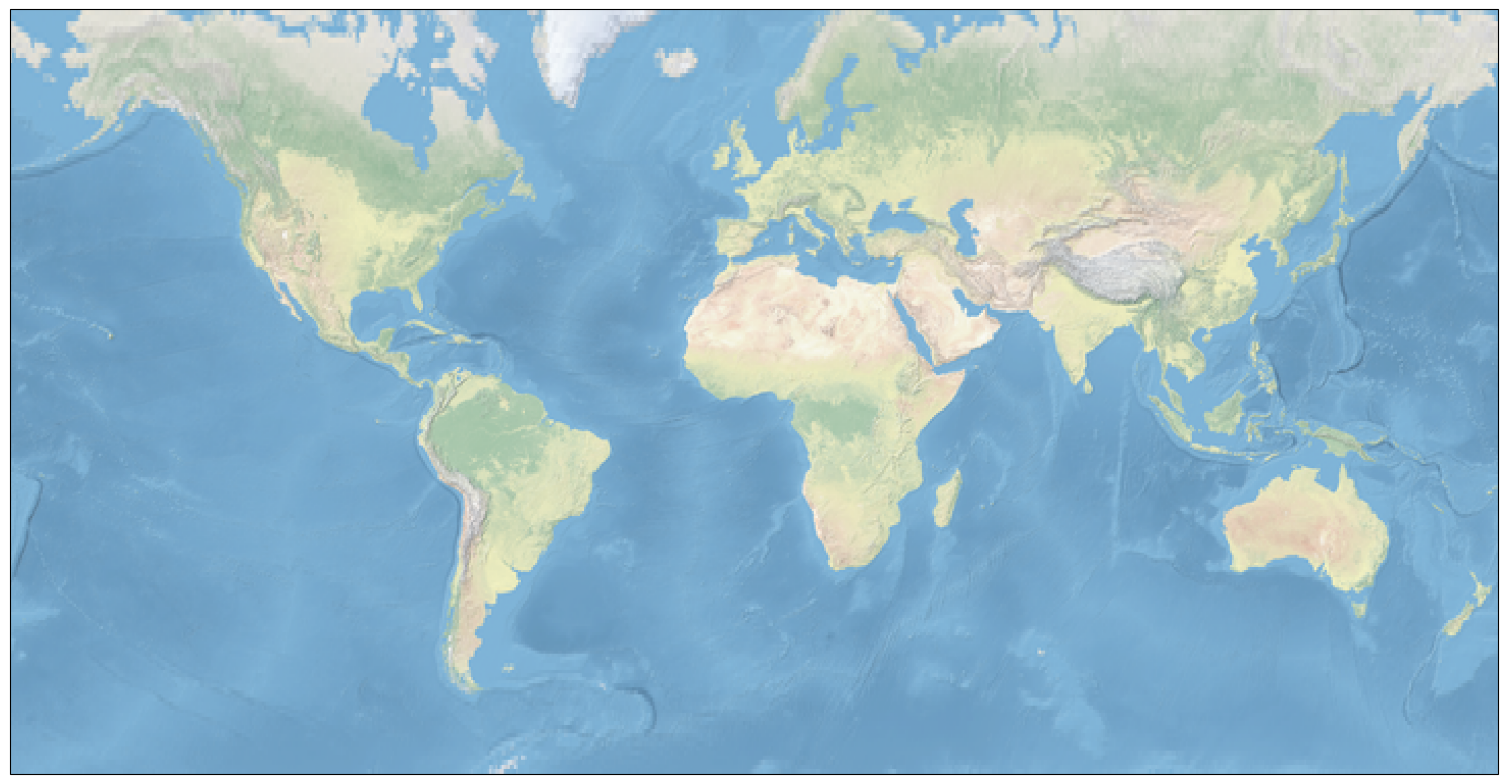

In [ ]:
# https://medium.com/udacity/creating-map-animations-with-python-97e24040f17b

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from datetime import datetime, timedelta


# Convert the 'deathyear' column to datetime objects
authors_maplapse_active['deathyear'] = pd.to_datetime(authors_maplapse_active['deathyear'], format='%Y', errors='coerce')

# Set up the figure and axis with a Mercator projection
fig = plt.figure(figsize=(19.2, 10.8))
ax = plt.axes(projection=ccrs.Mercator(central_longitude=0, min_latitude=-65, max_latitude=70))

# Set the background image and extent of the map
ax.stock_img()  # Use a stock image provided by Cartopy
ax.background_img(name='BM', resolution='low')  ## This one is from the website but it's not working
ax.set_extent([-170, 179, -65, 70], crs=ccrs.PlateCarree())


# Define a function to create the map for each 'deathyear'
def make_authors_map(date, data, ax=None, resolution='low'):
    if ax is None:
        fig = plt.figure(figsize=(19.2, 10.8))
        ax = plt.axes(projection=ccrs.Mercator(min_latitude=-65, max_latitude=70))

    ax.stock_img()
    #ax.background_img(name='BM', resolution=resolution) ## This one is from the website but it's not working
    ax.set_extent([-170, 179, -65, 70], crs=ccrs.PlateCarree())

    # Filter the data for authors who died before the given date
    authors = data[data['deathyear'] <= date]

    # Group by location and count the number of authors
    author_counts = authors.groupby(['longitude_active', 'latitude_active']).sum()['countcityactivegroupby']

    # Get lists for longitudes, latitudes, and sizes based on the 'countcityactivegroupby'
    index = list(author_counts.index)
    longs = [each[0] for each in index]
    lats = [each[1] for each in index]
    sizes = author_counts.values * 10  # Adjust size multiplier as needed

    # Plot the heatmap points
    ax.scatter(longs, lats, s=sizes, color='red', alpha=0.6, transform=ccrs.PlateCarree())

# Handle potential NaT values after conversion
authors_maplapse_active.dropna(subset=['deathyear'], inplace=True)

# Determine the start and end dates for the timelapse
start_date = authors_maplapse_active['deathyear'].min()
end_date = authors_maplapse_active['deathyear'].max()

# Generate an image for each year between start_date and end_date
for year in range(start_date.year, end_date.year + 1):
    date = datetime(year, 12, 31)  # Use the end of each year for the visualization
    ax = make_authors_map(date, authors_maplapse_active, ax=ax, resolution='full')
    fig.tight_layout(pad=-0.5)
    fig.savefig(f"frames/frame_{year}.png", dpi=100, frameon=False, facecolor='black')
    ax.clear()

# Use ffmpeg to combine the individual frames into a video
# Run the following command in your terminal or command prompt
# ffmpeg -framerate 1 -i frames/frame_%d.png -c:v h264 -r 30 -s 1920x1080 ./authors_maplapse.mp4

In [ ]:
import pandas as pd

# Assuming 'authors1000_800to1800' is your existing DataFrame
# Create the 'countcity' column
authors1000_800to1800['countcity'] = authors1000_800to1800.groupby('activecity')['activecity'].transform('count') # Remove the immediate type casting

# Create a new DataFrame with only the required columns
required_columns = ["bitrhyear", 'deathyear', 'activecity', 'latitude_active', 'longitude_active', 'countcity']
authors_maplapse = authors1000_800to1800[required_columns].copy()

# Handle or remove non-finite values in 'countcity' if necessary
# Example: Replace non-finite values with 0
authors_maplapse['countcity'] = authors_maplapse['countcity'].fillna(0).astype(int) # Fill NaN values and then convert to int

# Drop rows where 'activecity' column has NaN values
authors_maplapse.dropna(subset=['activecity'], inplace=True)

# Now 'authors_maplapse' contains only the columns you need
print(authors_maplapse.head(20))

In [ ]:
authors_maplapse_active.dtypes

bitrhyear                  object
deathyear                 float64
activecity                 object
latitude_active           float64
longitude_active          float64
countcitygroupby          float64
countcityactivegroupby    float64
dtype: object

In [ ]:
# export the result as excel file
file_name = 'authors1000_800to1800_maplapse.csv'
authors_maplapse.to_csv(file_name, index=False)

In [ ]:
# Specify the path in Google Drive
file_path = '/content/drive/My Drive/driv_authors1000_800to1800_maplapse.csv'

# Save the DataFrame to an Excel file in Google Drive
authors_maplapse.to_csv(file_path, index=False, header=True)

## MAPLAPSE - MAPLAPSE LIBRARY

In [ ]:
!pip install maplapse -q

In [ ]:
# Maplapse. source: https://maplapse.readthedocs.io/en/latest/


from maplapse import Animator


# Create an Animator object with the appropriate parameters
# Replace 'None' with the actual default value if the library provides a default world map
anim = Animator(shape="/content/World_Cities.shp",  # shapefile of the locations
                value= "/content/authors1000_800to1800_maplapse.csv",
                data_column="countcity",
                time_column='deathyear',
                map_type='proportional_circle',
                scale_factor=0.02,
                out_path='/path_to_output/maplapse800_1800.mp4',  # Path to save the animation
                shape_unique_column="CITY_NAME")

# Run the animation
anim.animate(duration=0.5)
